## Import Dependencies

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud

## Load Data

In [2]:
# link to dataset: https://www.kaggle.com/datasets/ravindrasinghrana/job-description-dataset

# Descriptions for each of the columns in the dataset:

# Job Id: A unique identifier for each job posting.
# Experience: The required or preferred years of experience for the job.
# Qualifications: The educational qualifications needed for the job.
# Salary Range: The range of salaries or compensation offered for the position.
# Location: The city or area where the job is located.
# Country: The country where the job is located.
# Latitude: The latitude coordinate of the job location.
# Longitude: The longitude coordinate of the job location.
# Work Type: The type of employment (e.g., full-time, part-time, contract).
# Company Size: The approximate size or scale of the hiring company.
# Job Posting Date: The date when the job posting was made public.
# Preference: Special preferences or requirements for applicants (e.g., Only Male or Only Female, or Both)
# Contact Person: The name of the contact person or recruiter for the job.
# Contact: Contact information for job inquiries.
# Job Title: The job title or position being advertised.
# Role: The role or category of the job (e.g., software developer, marketing manager).
# Job Portal: The platform or website where the job was posted.
# Job Description: A detailed description of the job responsibilities and requirements.
# Benefits: Information about benefits offered with the job (e.g., health insurance, retirement plans).
# Skills: The skills or qualifications required for the job.
# Responsibilities: Specific responsibilities and duties associated with the job.
# Company Name: The name of the hiring company.
# Company Profile: A brief overview of the company's background and mission.

# 1615940 entries

jobs_df = pd.read_csv('job_descriptions.csv', encoding='latin-1')
jobs_df.head()

Job Id     Experience Qualifications Salary Range    location  \
0  1089843540111562  5 to 15 Years         M.Tech    $59K-$99K     Douglas   
1   398454096642776  2 to 12 Years            BCA   $56K-$116K    Ashgabat   
2   481640072963533  0 to 12 Years            PhD   $61K-$104K       Macao   
3   688192671473044  4 to 11 Years            PhD    $65K-$91K  Porto-Novo   
4   117057806156508  1 to 12 Years            MBA    $64K-$87K    Santiago   

            Country  latitude  longitude  Work Type  Company Size  ...  \
0       Isle of Man   54.2361    -4.5481     Intern         26801  ...   
1      Turkmenistan   38.9697    59.5563     Intern        100340  ...   
2  Macao SAR, China   22.1987   113.5439  Temporary         84525  ...   
3             Benin    9.3077     2.3158  Full-Time        129896  ...   
4             Chile  -35.6751   -71.5429     Intern         53944  ...   

                 Contact                     Job Title  \
0   001-381-930-7517x737  Digital Marketing Specialist   
1           461-509-4216                 Web Developer   
2             9687619505            Operations Manager   
3  +1-820-643-5431x47576              Network Engineer   
4      343.975.4702x9340                 Event Manager   

                        Role    Job Portal  \
0       Social Media Manager      Snagajob   
1     Frontend Web Developer      Idealist   
2    Quality Control Manager  Jobs2Careers   
3  Wireless Network Engineer      FlexJobs   
4         Conference Manager  Jobs2Careers   

                                     Job Description  \
0  Social Media Managers oversee an organizations...   
1  Frontend Web Developers design and implement u...   
2  Quality Control Managers establish and enforce...   
3  Wireless Network Engineers design, implement, ...   
4  A Conference Manager coordinates and manages c...   

                                            Benefits  \
0  {'Flexible Spending Accounts (FSAs), Relocatio...   
1  {'Health Insurance, Retirement Plans, Paid Tim...   
2  {'Legal Assistance, Bonuses and Incentive Prog...   
3  {'Transportation Benefits, Professional Develo...   
4  {'Flexible Spending Accounts (FSAs), Relocatio...   

                                              skills  \
0  Social media platforms (e.g., Facebook, Twitte...   
1  HTML, CSS, JavaScript Frontend frameworks (e.g...   
2  Quality control processes and methodologies St...   
3  Wireless network design and architecture Wi-Fi...   
4  Event planning Conference logistics Budget man...   

                                    Responsibilities  \
0  Manage and grow social media accounts, create ...   
1  Design and code user interfaces for websites, ...   
2  Establish and enforce quality control standard...   
3  Design, configure, and optimize wireless netwo...   
4  Specialize in conference and convention planni...   

                            Company  \
0                 Icahn Enterprises   
1      PNC Financial Services Group   
2  United Services Automobile Assn.   
3                              Hess   
4                      Cairn Energy   

                                     Company Profile  
0  {"Sector":"Diversified","Industry":"Diversifie...  
1  {"Sector":"Financial Services","Industry":"Com...  
2  {"Sector":"Insurance","Industry":"Insurance: P...  
3  {"Sector":"Energy","Industry":"Mining, Crude-O...  
4  {"Sector":"Energy","Industry":"Energy - Oil & ...  

[5 rows x 23 columns]

In [3]:
# Print out dataframe info
jobs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615940 entries, 0 to 1615939
Data columns (total 23 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Job Id            1615940 non-null  int64  
 1   Experience        1615940 non-null  object 
 2   Qualifications    1615940 non-null  object 
 3   Salary Range      1615940 non-null  object 
 4   location          1615940 non-null  object 
 5   Country           1615940 non-null  object 
 6   latitude          1615940 non-null  float64
 7   longitude         1615940 non-null  float64
 8   Work Type         1615940 non-null  object 
 9   Company Size      1615940 non-null  int64  
 10  Job Posting Date  1615940 non-null  object 
 11  Preference        1615940 non-null  object 
 12  Contact Person    1615940 non-null  object 
 13  Contact           1615940 non-null  object 
 14  Job Title         1615940 non-null  object 
 15  Role              1615940 non-null  object 
 16  

## Data Cleaning

In [4]:
# Make a copy for data cleaning
df = jobs_df.copy()

### Drop Useless Features

In [5]:
# Drop 'Job Id'
df.drop('Job Id', axis=1, inplace=True)

# Drop 'location', 'Country', latitude', and 'longitude'
df.drop('location', axis=1, inplace=True)
df.drop('Country', axis=1, inplace=True)
df.drop('latitude', axis=1, inplace=True)
df.drop('longitude', axis=1, inplace=True)

# Drop 'Company Size'
df.drop('Company Size', axis=1, inplace=True)

# Drop 'Job Posting Date'
df.drop('Job Posting Date', axis=1, inplace=True)

# Drop 'Preference'
df.drop('Preference', axis=1, inplace=True)

# Drop 'Contact Person' & 'Contact'
df.drop('Contact Person', axis=1, inplace=True)
df.drop('Contact', axis=1, inplace=True)

# Drop 'Role'
df.drop('Role', axis=1, inplace=True)

# Drop 'Job Portal'
df.drop('Job Portal', axis=1, inplace=True)

# Drop 'Job Description'
df.drop('Job Description', axis=1, inplace=True)

# Drop 'Benefits'
df.drop('Benefits', axis=1, inplace=True)

# Drop 'Responsibilities'
df.drop('Responsibilities', axis=1, inplace=True)

# Drop 'Company' & 'Company Profile'
df.drop('Company', axis=1, inplace=True)
df.drop('Company Profile', axis=1, inplace=True)

df.head()

Experience Qualifications Salary Range  Work Type  \
0  5 to 15 Years         M.Tech    $59K-$99K     Intern   
1  2 to 12 Years            BCA   $56K-$116K     Intern   
2  0 to 12 Years            PhD   $61K-$104K  Temporary   
3  4 to 11 Years            PhD    $65K-$91K  Full-Time   
4  1 to 12 Years            MBA    $64K-$87K     Intern   

                      Job Title  \
0  Digital Marketing Specialist   
1                 Web Developer   
2            Operations Manager   
3              Network Engineer   
4                 Event Manager   

                                              skills  
0  Social media platforms (e.g., Facebook, Twitte...  
1  HTML, CSS, JavaScript Frontend frameworks (e.g...  
2  Quality control processes and methodologies St...  
3  Wireless network design and architecture Wi-Fi...  
4  Event planning Conference logistics Budget man...

### Split 'Experience'

In [6]:
# Split 'Experience' to 'Experience Lower' and 'Experience Upper'
experience_lower = []
experience_upper = []

# For each row, split experience to lower and upper
for index, row in df.iterrows():
    experience = row['Experience'].split()
    experience_lower.append(int(experience[0]))
    experience_upper.append(int(experience[2]))

# Add both 'Experience Lower' & 'Experience Upper' to dataframe
df['Experience Lower'] = experience_lower
df['Experience Upper'] = experience_upper

# Add 'Experience Est' & 'Experience Avg'
df['Experience Est'] = df['Experience Upper'] - df['Experience Lower']
df['Experience Avg'] = (df['Experience Upper'] + df['Experience Lower']) / 2

# Drop 'Experience'
df.drop('Experience', axis=1, inplace=True)

df.head()

Qualifications Salary Range  Work Type                     Job Title  \
0         M.Tech    $59K-$99K     Intern  Digital Marketing Specialist   
1            BCA   $56K-$116K     Intern                 Web Developer   
2            PhD   $61K-$104K  Temporary            Operations Manager   
3            PhD    $65K-$91K  Full-Time              Network Engineer   
4            MBA    $64K-$87K     Intern                 Event Manager   

                                              skills  Experience Lower  \
0  Social media platforms (e.g., Facebook, Twitte...                 5   
1  HTML, CSS, JavaScript Frontend frameworks (e.g...                 2   
2  Quality control processes and methodologies St...                 0   
3  Wireless network design and architecture Wi-Fi...                 4   
4  Event planning Conference logistics Budget man...                 1   

   Experience Upper  Experience Est  Experience Avg  
0                15              10            10.0  
1                12              10             7.0  
2                12              12             6.0  
3                11               7             7.5  
4                12              11             6.5

### Split 'Salary Range'

In [7]:
# Split 'Salary Range' to salary_lower and salary_upper
salary_lower = []
salary_upper = []

# For each row, split salary to lower and upper
for index, row in df.iterrows():
    salary = row['Salary Range'].split('-')
    salary_lower.append(int(salary[0][1:-1]))
    salary_upper.append(int(salary[1][1:-1]))

# Add 'Salary Lower' & 'Salary Upper'   
df['Salary Lower'] = salary_lower
df['Salary Upper'] = salary_upper

# Add 'Salary Avg' to dataframe
df['Salary Avg'] = (df['Salary Upper'] + df['Salary Lower']) / 2

# Drop 'Salary Range'
df.drop('Salary Range', axis=1, inplace=True)

df.head()

Qualifications  Work Type                     Job Title  \
0         M.Tech     Intern  Digital Marketing Specialist   
1            BCA     Intern                 Web Developer   
2            PhD  Temporary            Operations Manager   
3            PhD  Full-Time              Network Engineer   
4            MBA     Intern                 Event Manager   

                                              skills  Experience Lower  \
0  Social media platforms (e.g., Facebook, Twitte...                 5   
1  HTML, CSS, JavaScript Frontend frameworks (e.g...                 2   
2  Quality control processes and methodologies St...                 0   
3  Wireless network design and architecture Wi-Fi...                 4   
4  Event planning Conference logistics Budget man...                 1   

   Experience Upper  Experience Est  Experience Avg  Salary Lower  \
0                15              10            10.0            59   
1                12              10             7.0            56   
2                12              12             6.0            61   
3                11               7             7.5            65   
4                12              11             6.5            64   

   Salary Upper  Salary Avg  
0            99        79.0  
1           116        86.0  
2           104        82.5  
3            91        78.0  
4            87        75.5

### Get Skills

In [8]:
# Store skills
skills = []

for row in df['skills']:
    # Remove parentheses and everything in parentheses
    row = re.sub(u"\\(.*?\\)", "", row)
    
    # Split row by ' ' & ',' and remove empty element
    row = re.split(' |,', row)
    row = list(filter(None, row))
    
    # Use to store words in row & list of skills
    temp_word = ''
    temp_list = []
    for word in row:
        # If word starts with upper char,
        # add temp_word to list and store new word
        if word[0].isupper():
            temp_list.append(temp_word)
            temp_word = word
            
        # Otherwise, add word to temp_word
        else:
            temp_word = temp_word + ' ' + word
    # Add the last word to list
    temp_list.append(temp_word)
    # Remove empty element again
    temp_list = list(filter(None, temp_list))
    
    # Add skills to list
    skills.append(temp_list)

# Add to dataframe
df['Skills'] = skills

# Remove 'skills' column
df.drop('skills', axis=1, inplace=True)

df.head()

Qualifications  Work Type                     Job Title  Experience Lower  \
0         M.Tech     Intern  Digital Marketing Specialist                 5   
1            BCA     Intern                 Web Developer                 2   
2            PhD  Temporary            Operations Manager                 0   
3            PhD  Full-Time              Network Engineer                 4   
4            MBA     Intern                 Event Manager                 1   

   Experience Upper  Experience Est  Experience Avg  Salary Lower  \
0                15              10            10.0            59   
1                12              10             7.0            56   
2                12              12             6.0            61   
3                11               7             7.5            65   
4                12              11             6.5            64   

   Salary Upper  Salary Avg                                             Skills  
0            99        79.0  [Social media platforms, Content creation and ...  
1           116        86.0  [HTML, CSS, JavaScript, Frontend frameworks, U...  
2           104        82.5  [Quality control processes and methodologies, ...  
3            91        78.0  [Wireless network design and architecture, Wi-...  
4            87        75.5  [Event planning, Conference logistics, Budget ...

In [9]:
# Get all unique skills
# Can be used for one-hot encoding later
all_skills = []
for l in skills:
    for skill in l:
        all_skills.append(skill)

skills_set = set(all_skills)
print('Number of unique skills: ' + str(len(skills_set)))

Number of unique skills: 1458


In [10]:
print('Number of unique job titles: ' + str(len(df['Job Title'].unique())))

Number of unique job titles: 147


# EDA

In [11]:
df.describe()

Experience Lower  Experience Upper  Experience Est  Experience Avg  \
count      1.615940e+06      1.615940e+06    1.615940e+06    1.615940e+06   
mean       2.501808e+00      1.149798e+01    8.996174e+00    6.999895e+00   
std        1.707809e+00      2.291933e+00    2.859574e+00    1.428458e+00   
min        0.000000e+00      8.000000e+00    3.000000e+00    4.000000e+00   
25%        1.000000e+00      9.000000e+00    7.000000e+00    6.000000e+00   
50%        3.000000e+00      1.100000e+01    9.000000e+00    7.000000e+00   
75%        4.000000e+00      1.300000e+01    1.100000e+01    8.000000e+00   
max        5.000000e+00      1.500000e+01    1.500000e+01    1.000000e+01   

       Salary Lower  Salary Upper    Salary Avg  
count  1.615940e+06  1.615940e+06  1.615940e+06  
mean   6.000343e+01  1.049789e+02  8.249115e+01  
std    3.163964e+00  1.471749e+01  7.528413e+00  
min    5.500000e+01  8.000000e+01  6.750000e+01  
25%    5.700000e+01  9.200000e+01  7.600000e+01  
50%    6.000000e+01  1.050000e+02  8.250000e+01  
75%    6.300000e+01  1.180000e+02  8.900000e+01  
max    6.500000e+01  1.300000e+02  9.750000e+01

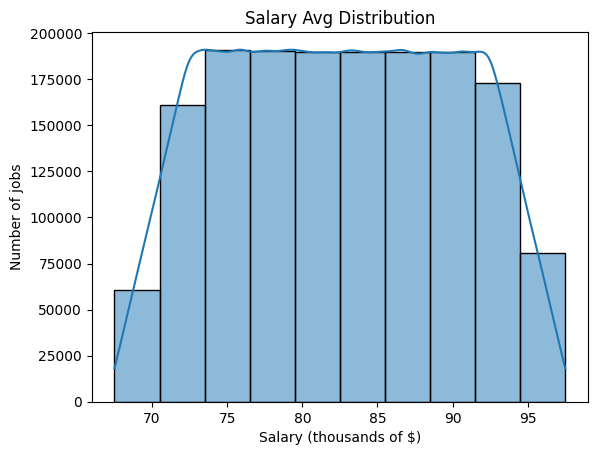

In [12]:
# Visualize the salary distribution using 'Salary Avg'
sns.histplot(df['Salary Avg'], bins=10, kde=True)
plt.title('Salary Avg Distribution')
plt.ylabel('Number of jobs')
plt.xlabel('Salary (thousands of $)')
plt.show()

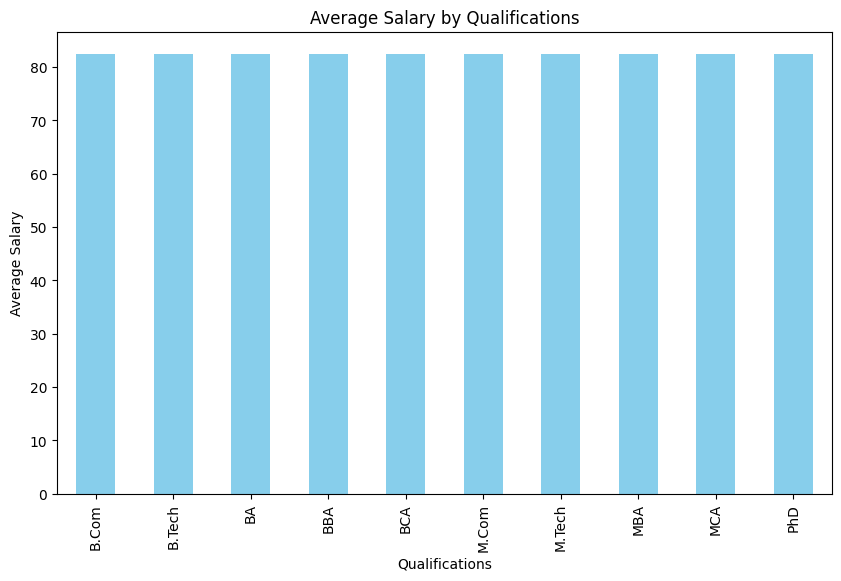

In [13]:
# Salary by Qualifications
plt.figure(figsize=(10, 6))
df.groupby('Qualifications')['Salary Avg'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Salary by Qualifications')
plt.xlabel('Qualifications')
plt.ylabel('Average Salary')
plt.show()

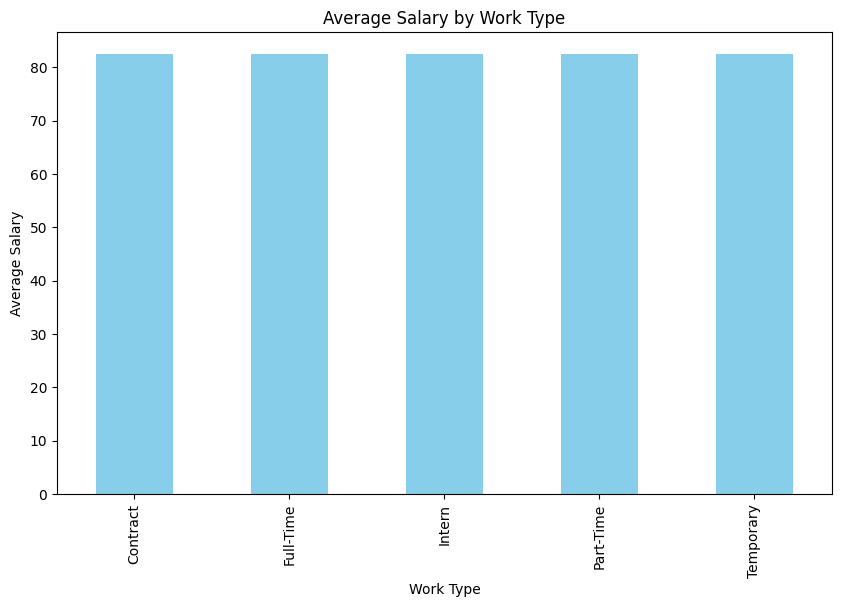

In [14]:
# Salary by Work Type
plt.figure(figsize=(10, 6))
df.groupby('Work Type')['Salary Avg'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Salary by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Average Salary')
plt.show()

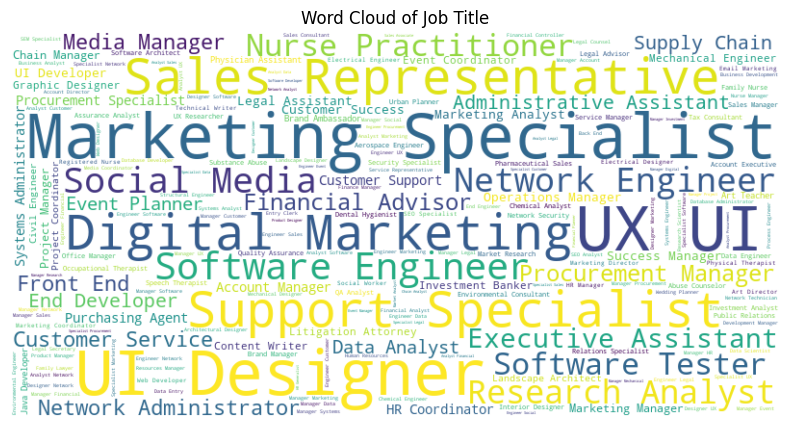

In [15]:
# Word cloud of 'Job Title'

# Combine all key skills into a single string
all_job_titles = ' '.join(df['Job Title'].explode().dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_job_titles)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.title('Word Cloud of Job Title')
plt.show()

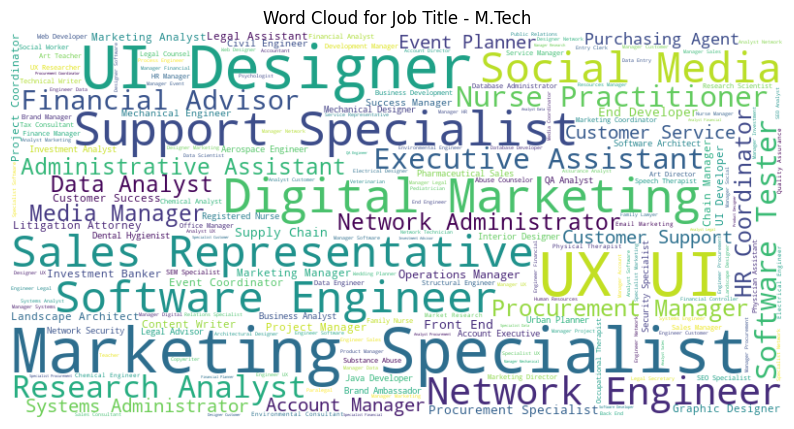

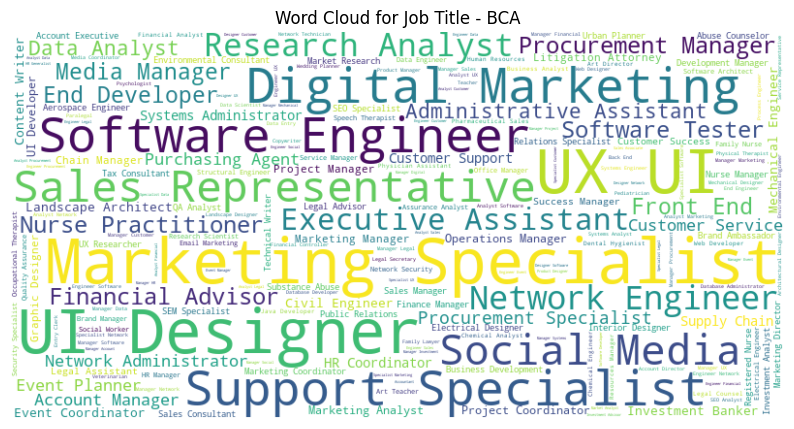

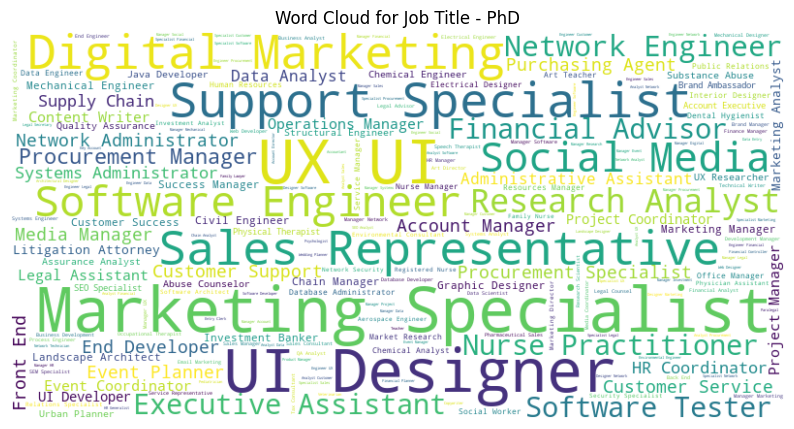

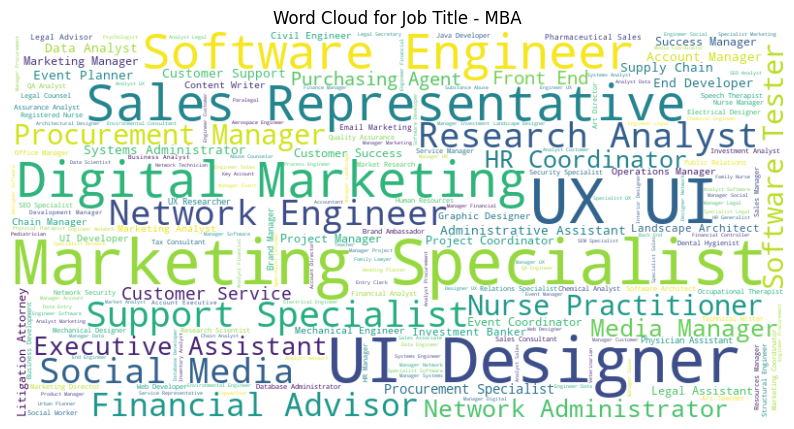

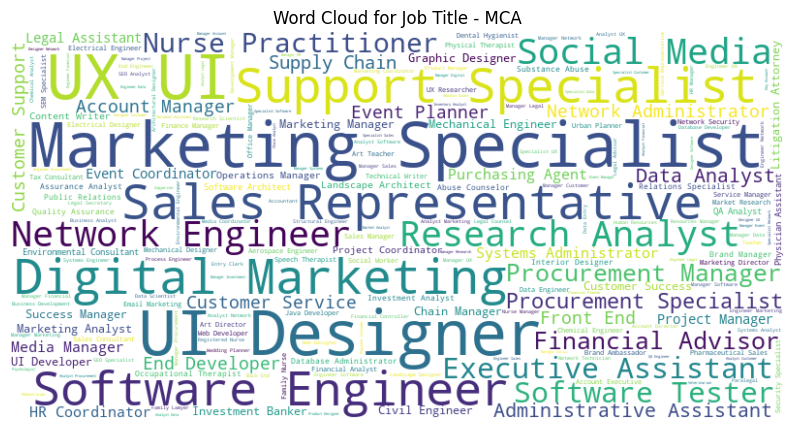

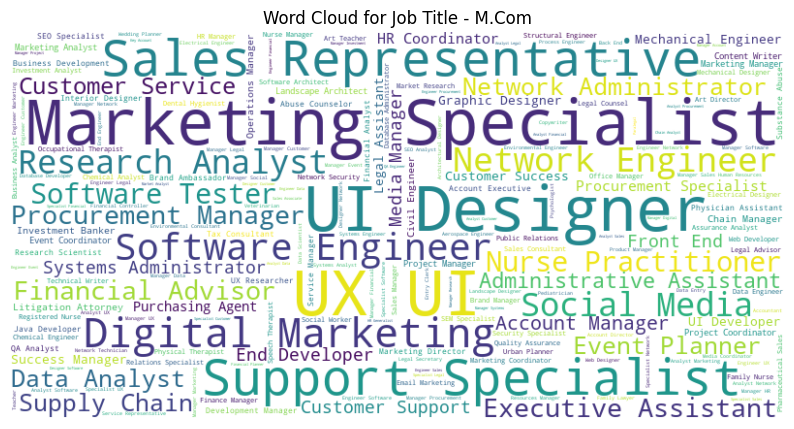

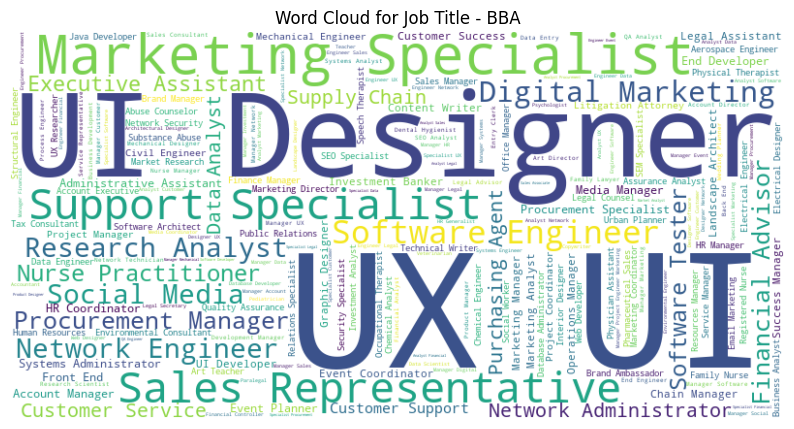

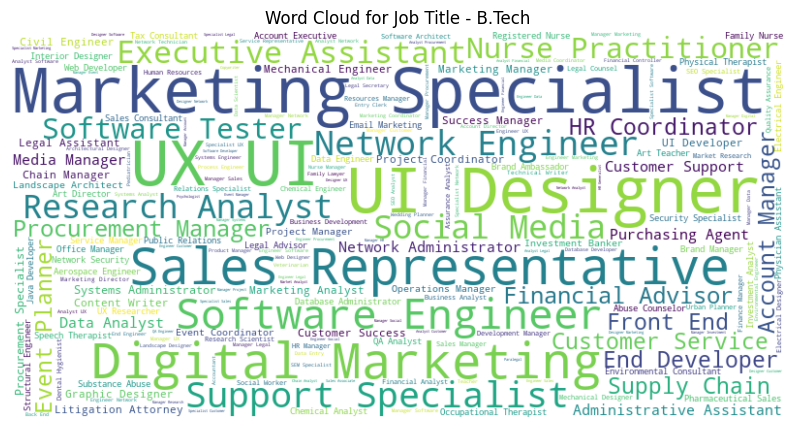

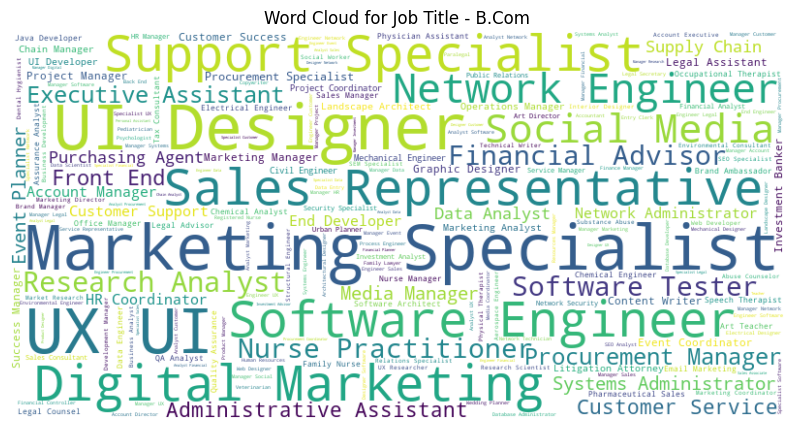

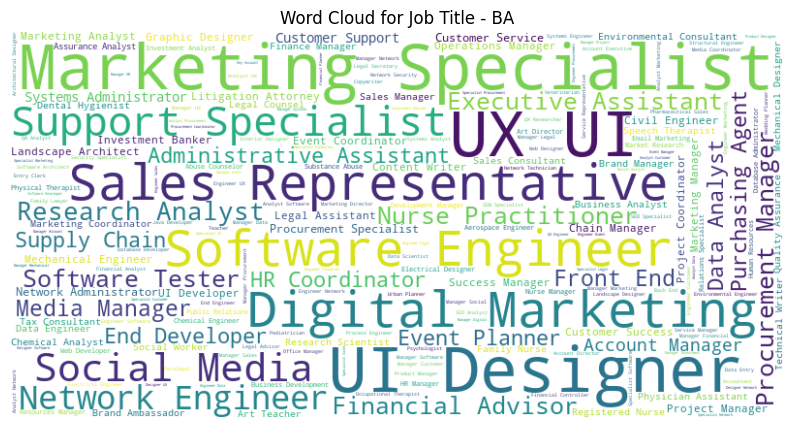

In [16]:
# Word cloud of 'Job Title' based on 'Qualifications'

qualifications = df['Qualifications'].unique()

for q in qualifications:
    filtered_data = df[df['Qualifications'] == q]

    # Combine all job title for the qualifications into a single string
    job_titles = ' '.join(filtered_data['Job Title'])

    # Generate the word cloud
    if len(job_titles) > 0:
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(job_titles)

        # Plot the WordCloud image for the current experience level
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for Job Title - {q}')
        plt.show()

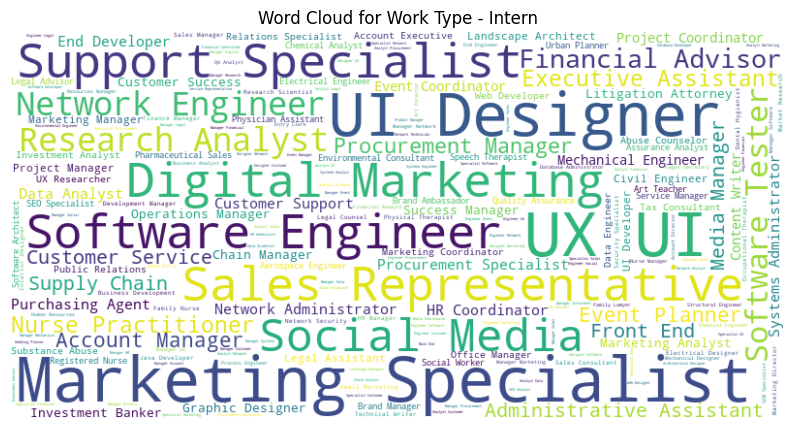

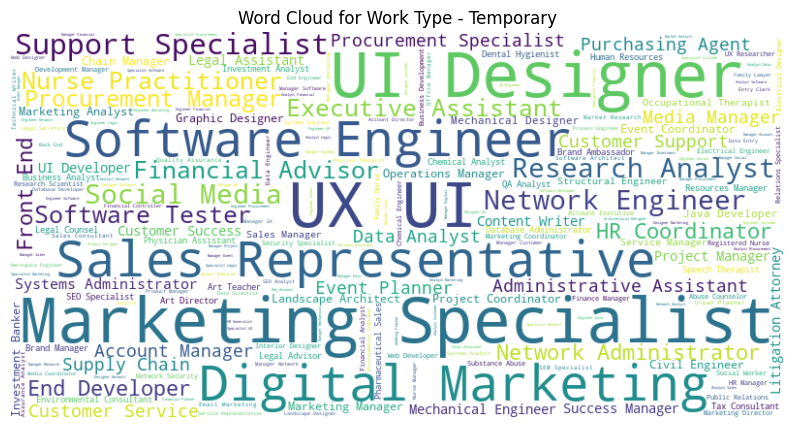

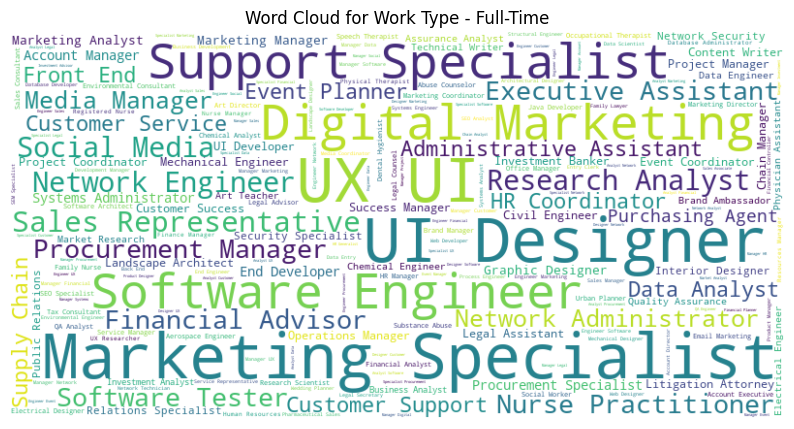

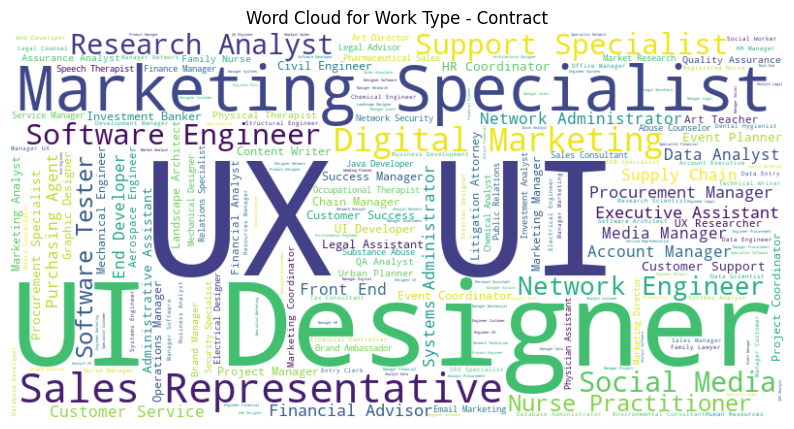

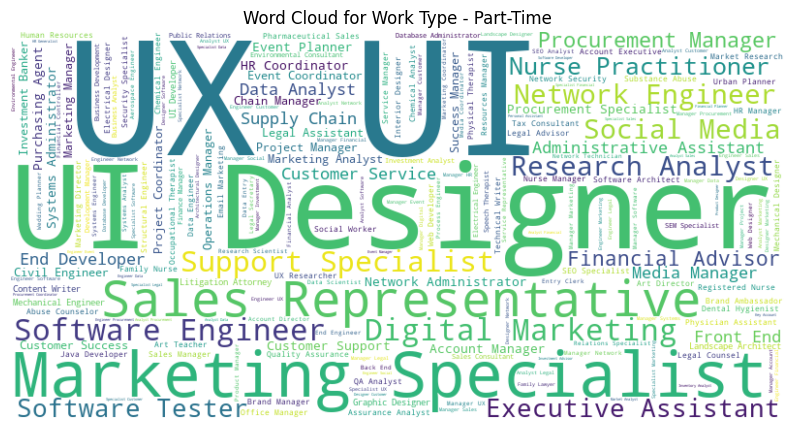

In [17]:
# Word cloud of 'Job Title' based on 'Work Type'

work_type = df['Work Type'].unique()

for w in work_type:
    filtered_data = df[df['Work Type'] == w]

    # Combine all job title for the work type into a single string
    job_titles = ' '.join(filtered_data['Job Title'])

    # Generate the word cloud
    if len(job_titles) > 0:
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(job_titles)

        # Plot the WordCloud image for the current experience level
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for Work Type - {w}')
        plt.show()

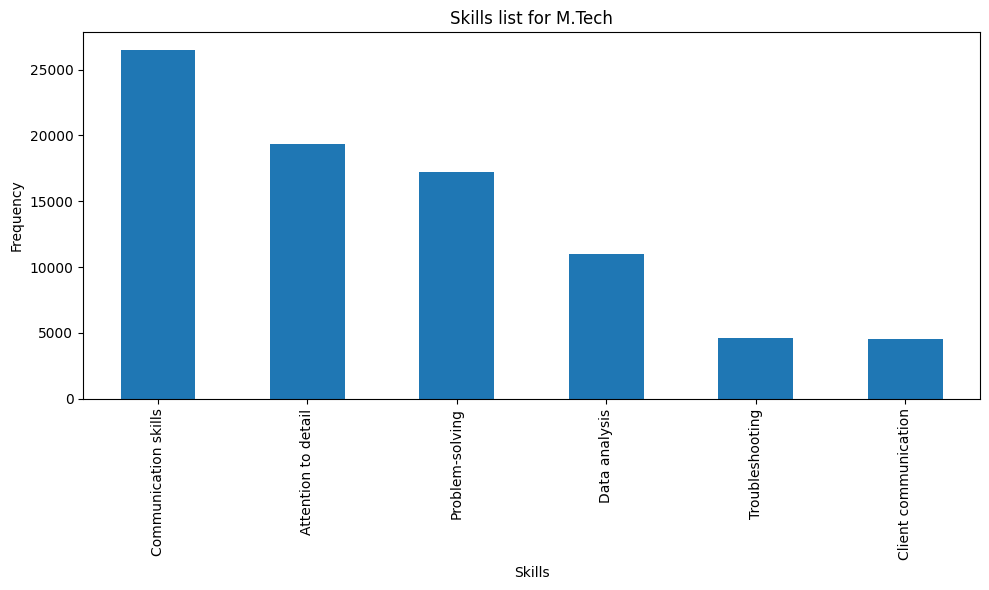

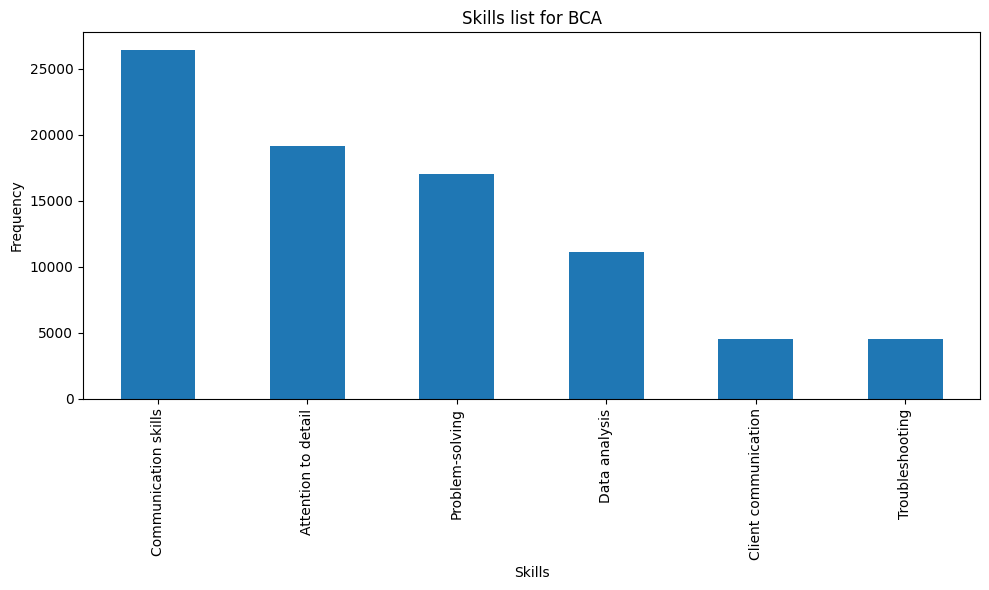

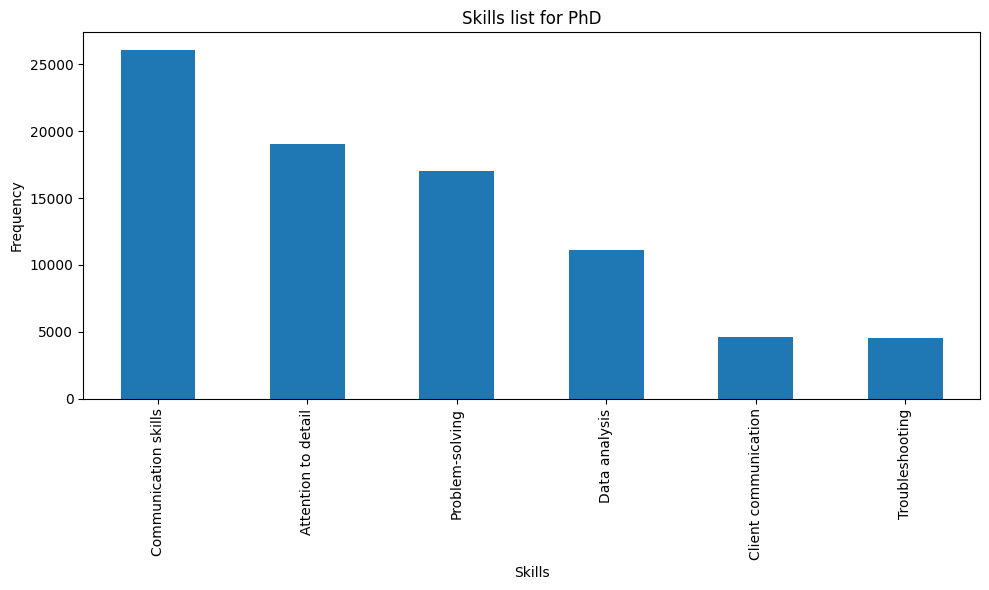

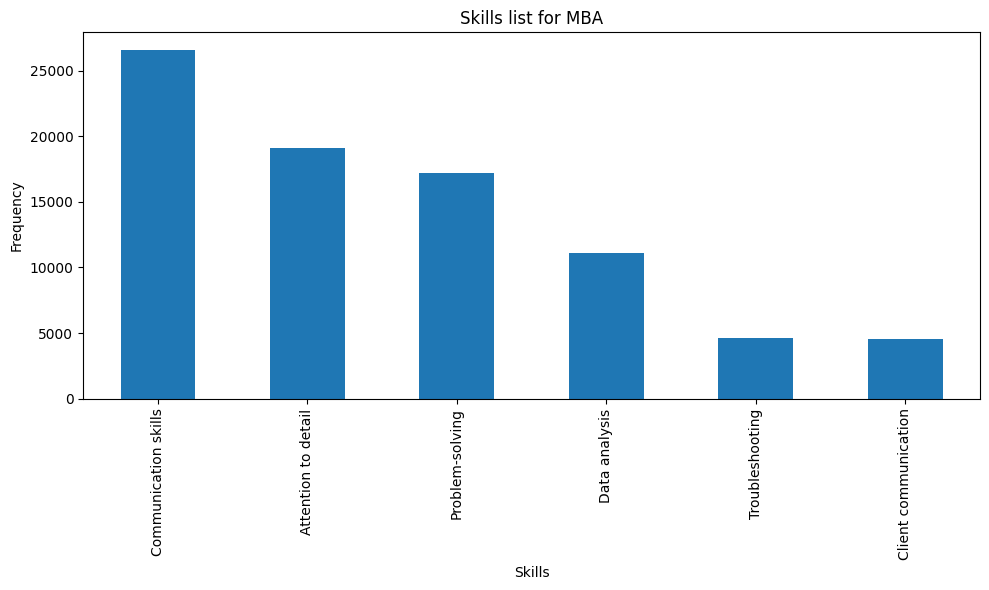

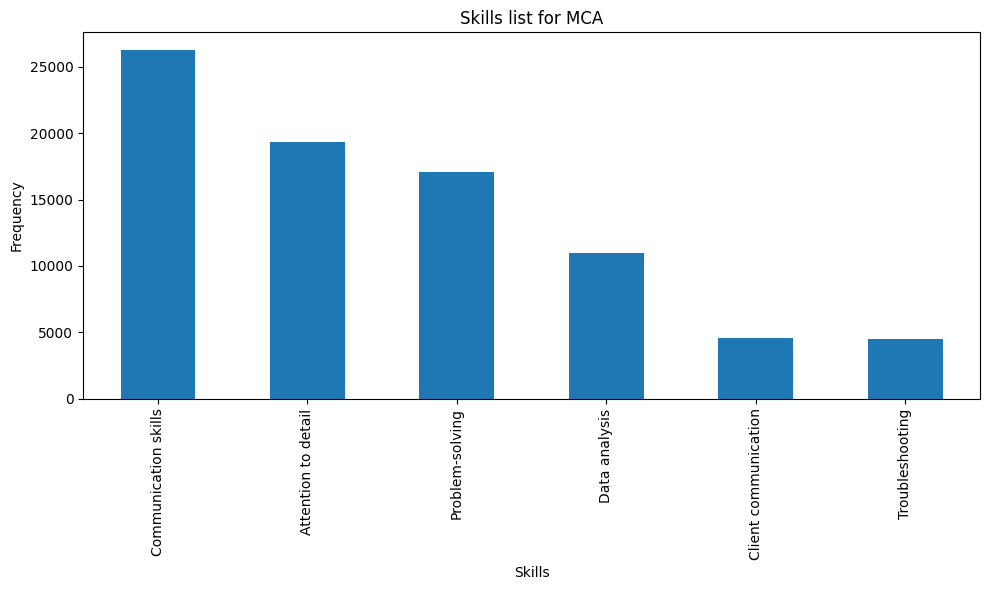

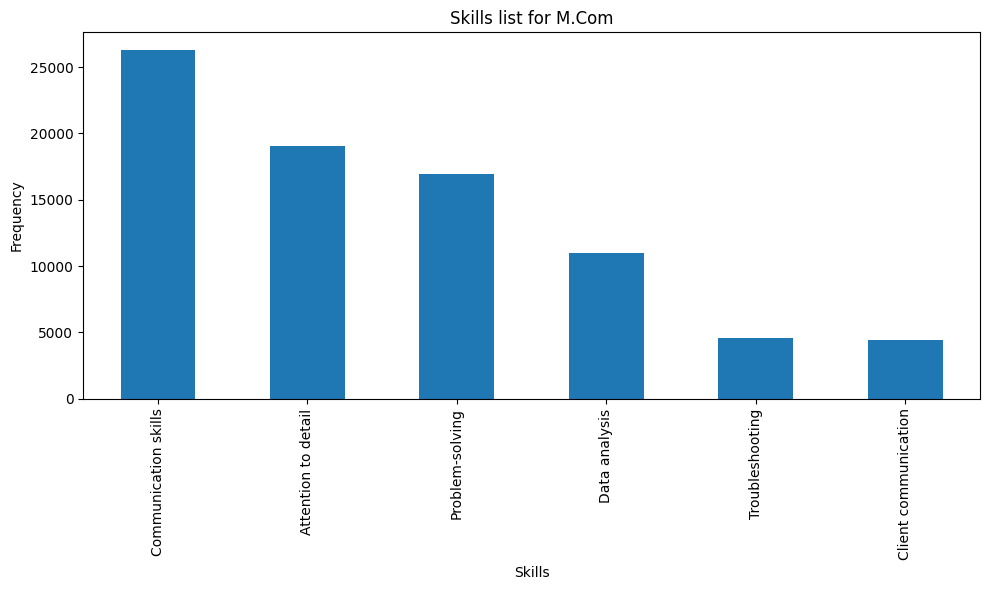

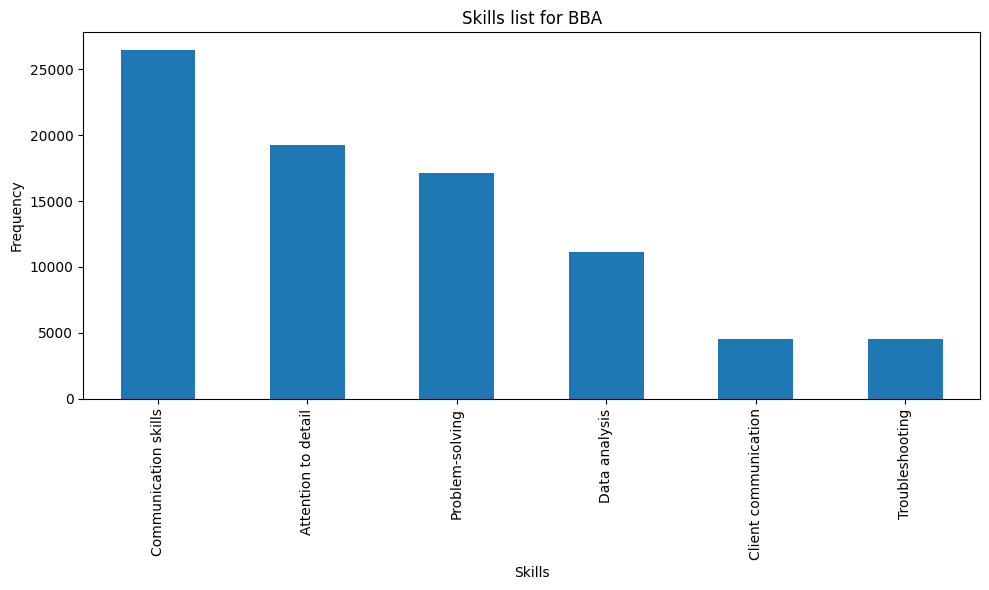

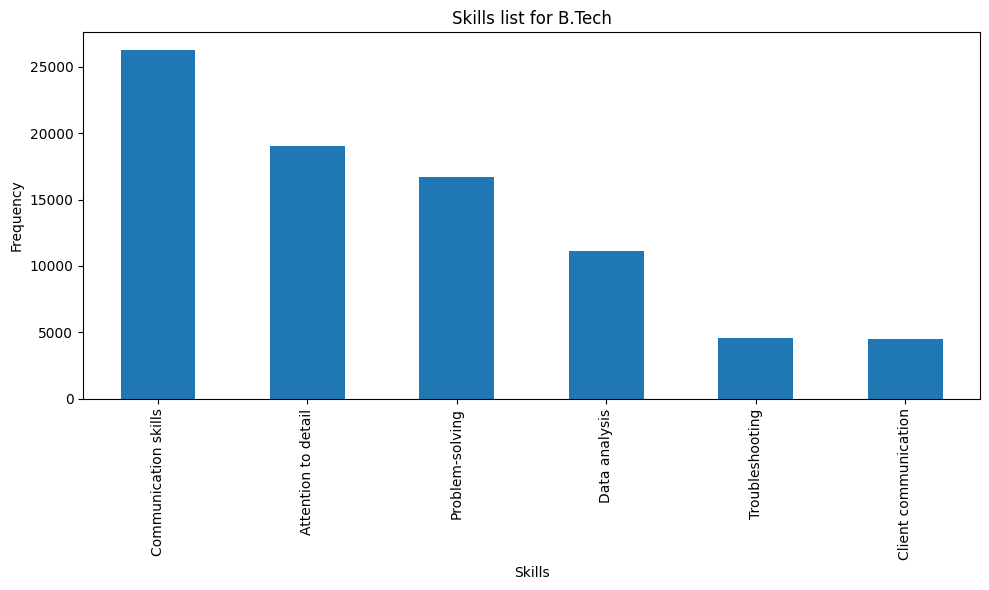

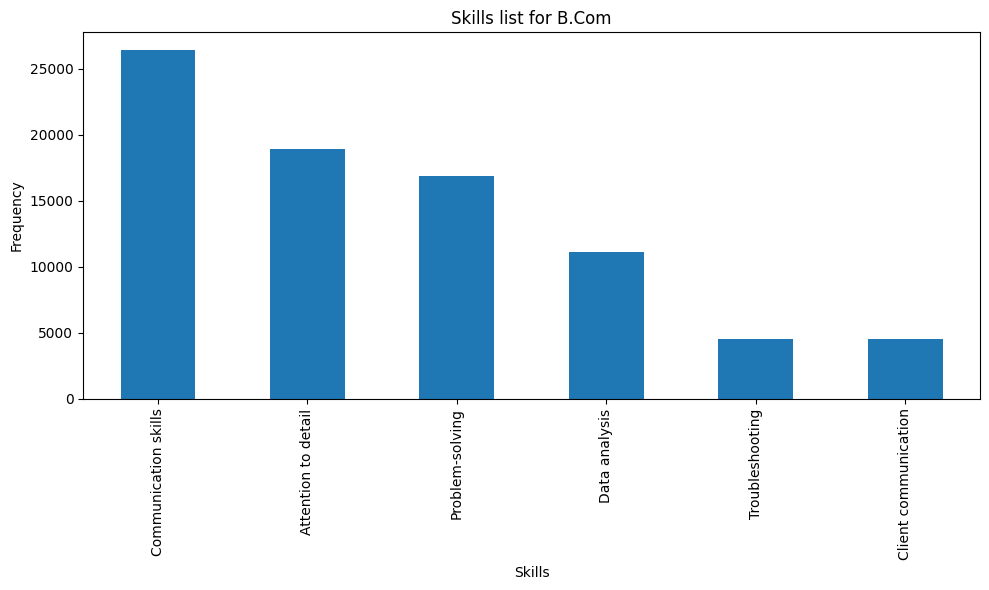

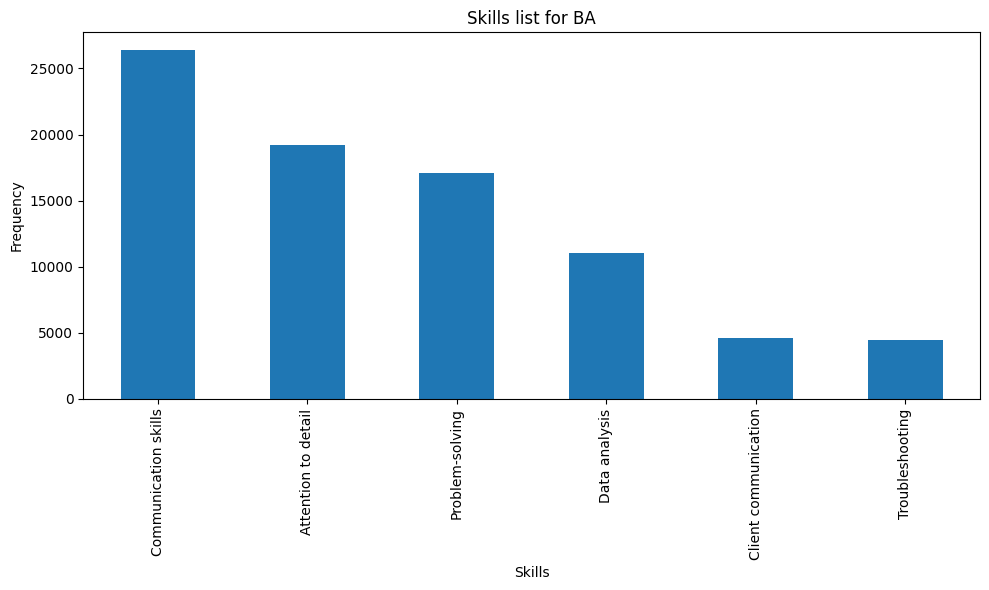

In [18]:
# Top 6 skills required for different qualifications

for q in qualifications:
    filtered_data = df[df['Qualifications'] == q]['Skills']

    # Store skills for qualification
    skills_list = []
    
    # Add all skills to list
    for skills in filtered_data:
        for skill in skills:
            skills_list.append(skill)
    
    # Plot
    skill_counts = pd.Series(skills_list).value_counts().head(6)
    skill_counts.plot(kind='bar', figsize=(10, 6))

    plt.xlabel('Skills')
    plt.ylabel('Frequency')
    plt.title(f'Skills list for {q}')

    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()